In [3]:
# 1. Import libraries
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# 2. Load your dataset
df_eval = pd.read_csv("../datasets/Indian_Kids_Screen_Time.csv")

# 3. Encode categorical columns
df_encoded_eval = df_eval.copy()
label_enc_eval = LabelEncoder()
for col in df_encoded_eval.select_dtypes(include=['object', 'bool']).columns:
    df_encoded_eval[col] = label_enc_eval.fit_transform(df_encoded_eval[col])

# 4. Features & target
X_eval = df_encoded_eval.drop('Health_Impacts', axis=1)
y_eval = df_encoded_eval['Health_Impacts']

# 5. Define K-Fold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# 6. Decision Tree with K-Fold
dt_model_eval = DecisionTreeClassifier(random_state=42)
dt_scores = cross_val_score(dt_model_eval, X_eval, y_eval, cv=kfold, scoring='accuracy')

print("--- Model Evaluation Results ---")
print("\nDecision Tree Accuracy Scores:", dt_scores)
print("Decision Tree Mean Accuracy:", dt_scores.mean())

# 7. Random Forest with K-Fold
rf_model_eval = RandomForestClassifier(random_state=42)
rf_scores = cross_val_score(rf_model_eval, X_eval, y_eval, cv=kfold, scoring='accuracy')

print("\nRandom Forest Accuracy Scores:", rf_scores)
print("Random Forest Mean Accuracy:", rf_scores.mean())

--- Model Evaluation Results ---

Decision Tree Accuracy Scores: [0.30313948 0.31652084 0.29917611 0.30329557 0.28424305]
Decision Tree Mean Accuracy: 0.30127500923593264

Random Forest Accuracy Scores: [0.33144622 0.34585692 0.32595263 0.33213182 0.31874356]
Random Forest Mean Accuracy: 0.3308262303666864


Successfully generated and saved the fixed decision tree visualization.


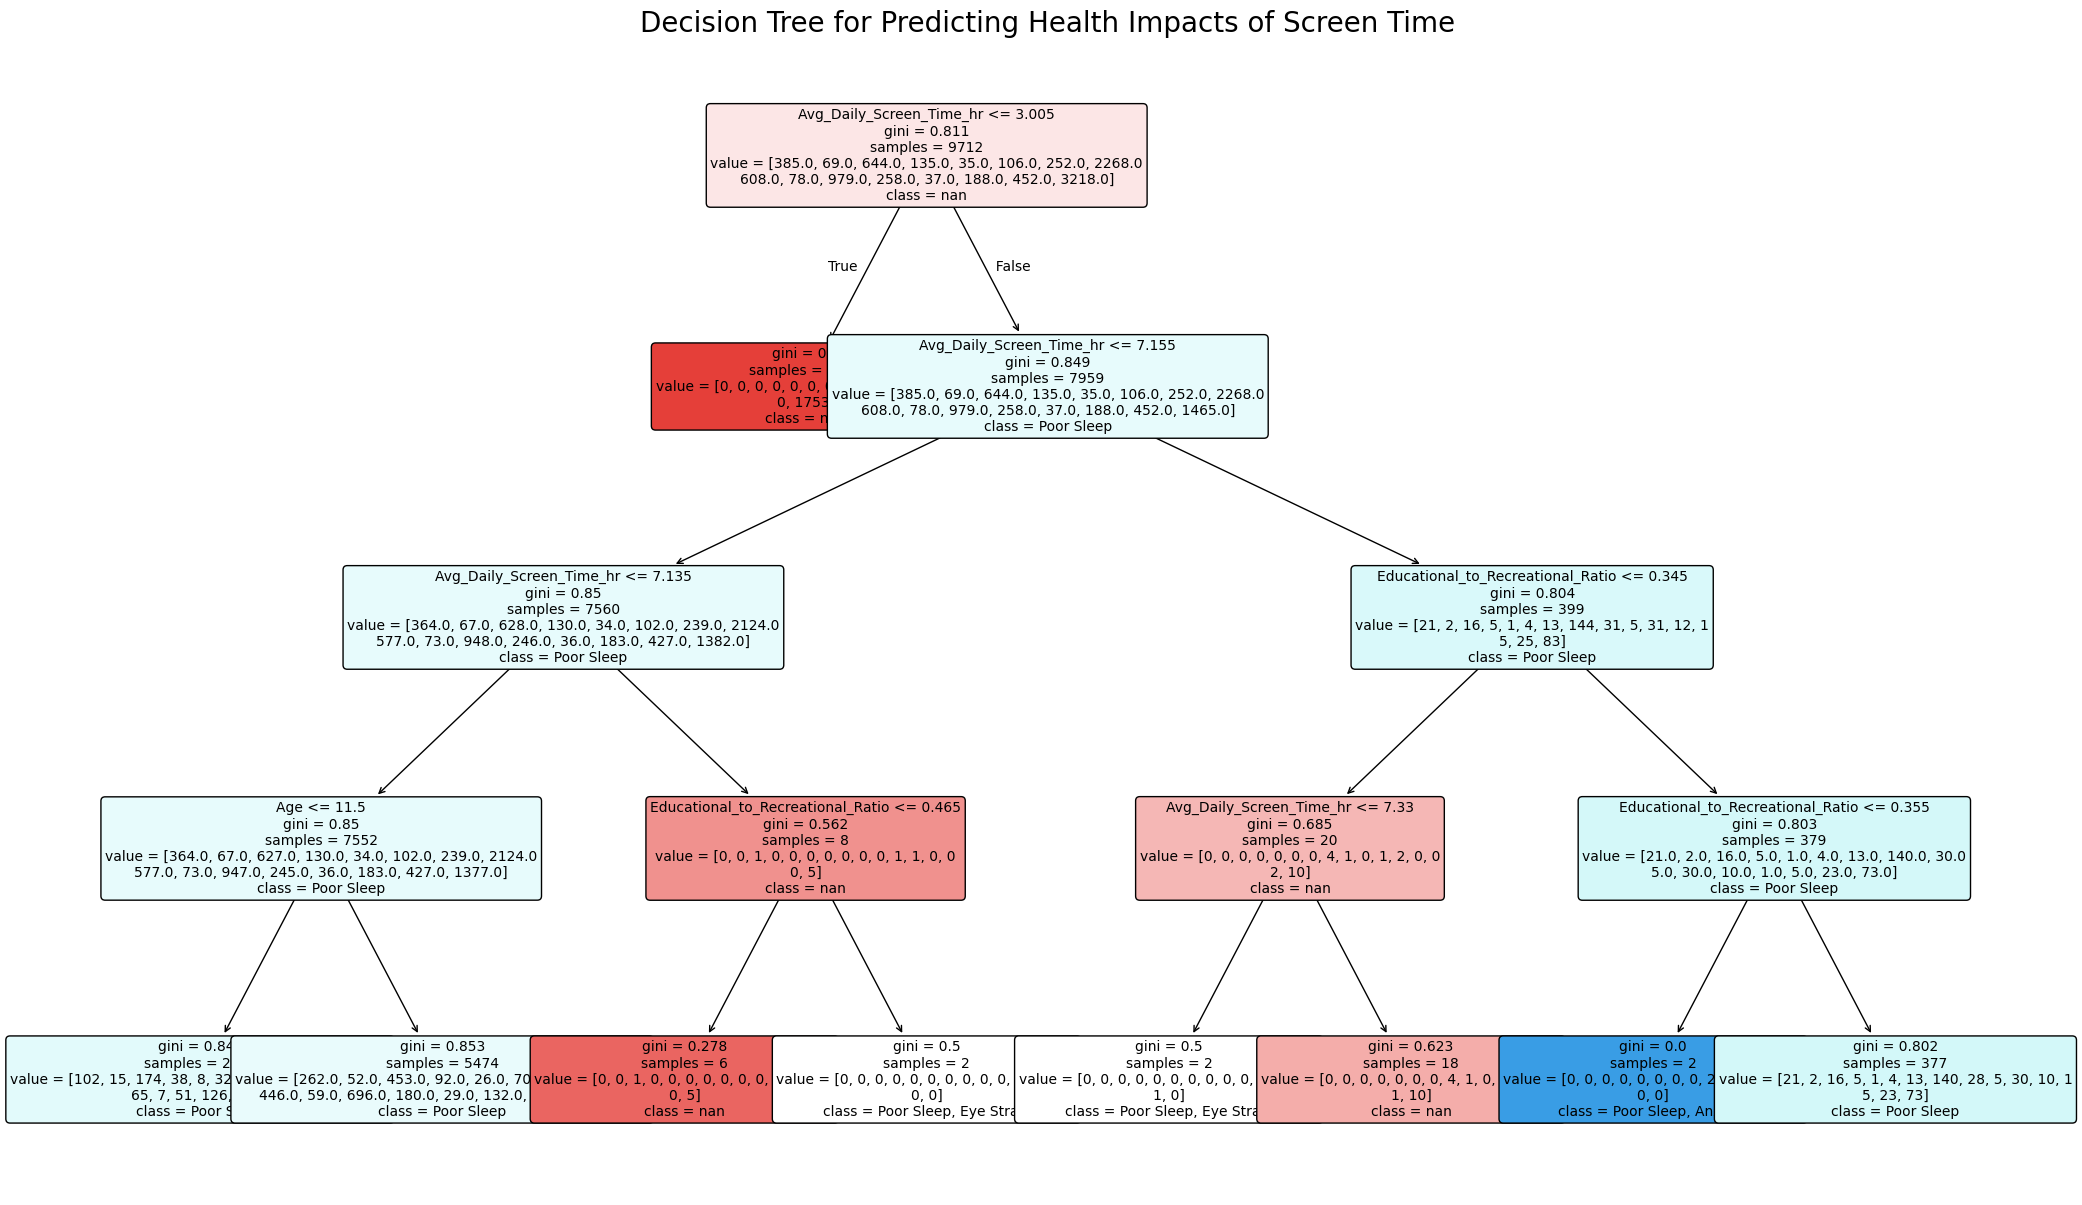

In [6]:
# 1. Import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# 2. Load your dataset
df_viz = pd.read_csv("../datasets/Indian_Kids_Screen_Time.csv")

# 3. Encode categorical variables
# We create a copy to avoid modifying the original dataframe for the next block
df_encoded_viz = df_viz.copy()
label_enc_viz = LabelEncoder()
label_mappings_viz = {}
for col in df_encoded_viz.select_dtypes(include=['object', 'bool']).columns:
    df_encoded_viz[col] = label_enc_viz.fit_transform(df_encoded_viz[col])
    label_mappings_viz[col] = dict(zip(range(len(label_enc_viz.classes_)), label_enc_viz.classes_))

# 4. Features and target
X_viz = df_encoded_viz.drop('Health_Impacts', axis=1)
y_viz = df_encoded_viz['Health_Impacts']

# 5. Train Decision Tree
dt_model_viz = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model_viz.fit(X_viz, y_viz)

# 6. Plot Decision Tree
# Get the original string names for the classes
class_names_from_mapping = list(label_mappings_viz['Health_Impacts'].values())

# FIX: Ensure all class names are strings before plotting
class_names_viz = [str(c) for c in class_names_from_mapping]

plt.figure(figsize=(25, 15))
plot_tree(dt_model_viz,
          feature_names=X_viz.columns,
          class_names=class_names_viz,
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree for Predicting Health Impacts of Screen Time", fontsize=20)
plt.savefig("decision_tree_visualization_fixed.png")

# The plot is saved to a file named 'decision_tree_visualization_fixed.png'
print("Successfully generated and saved the fixed decision tree visualization.")